## Maestría en Inteligencia Artificial Aplicada (MNA)
### Proyecto Integrador
### Dra. Grettel Barceló Alonso / Dr. Carlos Alberto Villaseñor Padilla
### Avance 2. Ingeniería de características

### Integrantes
- A01794457 - Iossif Moises Palli Laura
- A01793984 - Brenda Zurazy Rodríguez Pérez
- A01794630 - Jesús Ramseths Echeverría Rivera

In [23]:
# Paqueterías a utilizar
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### I. Carga de los datos

In [3]:
df = pd.read_excel('../content/q_a_db.xlsx') # Se realiza la carga del conjunto de preguntas y respuestas
df.head()

,date,question,answer,category
0,2001-06-04,¿Qué fecha fue publicada la Ley de Fondos de I...,El 4 de junio de 2001.,Fondos de Inversión
1,2001-06-04,¿Qué regula la Ley de Fondos de Inversión?,Regula la organización y funcionamiento de los...,Fondos de Inversión
2,2001-06-04,¿Qué debe fomentar la aplicación de esta ley?,El desarrollo equilibrado y la diversificación...,Fondos de Inversión
3,2001-06-04,¿Qué es un activo objeto de inversión?,Son valores títulos y documentos aplicables al...,Fondos de Inversión
4,2001-06-04,¿Quién regula los fondos de inversión en México?,La Comisión Nacional Bancaria y de Valores.,Fondos de Inversión


### II. Construcción

Limpieza de datos

In [9]:
# Cambiar a tipo de fecha
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')

# Eliminar filas duplicadas de las variables 'question' y 'answer'
df_clean = df.drop_duplicates(subset=['question', 'answer'])

# 3. Eliminar espacios en blanco extra al principio y al final en las columnas de texto
df_clean['question'] = df_clean['question'].str.strip()
df_clean['answer'] = df_clean['answer'].str.strip()
df_clean['category'] = df_clean['category'].str.strip()

In [13]:
df_clean.head()

,date,question,answer,category
0,2001-06-04,¿Qué fecha fue publicada la Ley de Fondos de I...,El 4 de junio de 2001.,Fondos de Inversión
1,2001-06-04,¿Qué regula la Ley de Fondos de Inversión?,Regula la organización y funcionamiento de los...,Fondos de Inversión
2,2001-06-04,¿Qué debe fomentar la aplicación de esta ley?,El desarrollo equilibrado y la diversificación...,Fondos de Inversión
3,2001-06-04,¿Qué es un activo objeto de inversión?,Son valores títulos y documentos aplicables al...,Fondos de Inversión
4,2001-06-04,¿Quién regula los fondos de inversión en México?,La Comisión Nacional Bancaria y de Valores.,Fondos de Inversión


### III. Normalización

Ahora podemos tokenizar cada enunciado de las variables 'question' y 'answer', es decir vamos a dividir el texto en unidades más pequeñas, llamadas tokens.
Estos tokens pueden ser palabras, frases o incluso caracteres. Es un paso fundamental en el procesamiento de lenguaje natural (PLN) porque convierte el texto en una forma más manejable para análisis o modelado.

In [14]:
# Descargar los recursos necesarios de nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
# Tokenizar las preguntas ('question') y respuestas ('answer')
df_clean['question_tokens'] = df_clean['question'].apply(word_tokenize)
df_clean['answer_tokens'] = df_clean['answer'].apply(word_tokenize)

In [16]:
# Mostrar algunas filas con las nuevas columnas tokenizadas
print(df_clean[['question', 'question_tokens', 'answer', 'answer_tokens']].head())

                                            question  \
0  ¿Qué fecha fue publicada la Ley de Fondos de I...   
1         ¿Qué regula la Ley de Fondos de Inversión?   
2      ¿Qué debe fomentar la aplicación de esta ley?   
3             ¿Qué es un activo objeto de inversión?   
4   ¿Quién regula los fondos de inversión en México?   

                                     question_tokens  \
0  [¿Qué, fecha, fue, publicada, la, Ley, de, Fon...   
1  [¿Qué, regula, la, Ley, de, Fondos, de, Invers...   
2  [¿Qué, debe, fomentar, la, aplicación, de, est...   
3   [¿Qué, es, un, activo, objeto, de, inversión, ?]   
4  [¿Quién, regula, los, fondos, de, inversión, e...   

                                              answer  \
0                             El 4 de junio de 2001.   
1  Regula la organización y funcionamiento de los...   
2  El desarrollo equilibrado y la diversificación...   
3  Son valores títulos y documentos aplicables al...   
4        La Comisión Nacional Bancaria y de Va

### IV. Selección / Extracción

Otra de las etapas importantes en el proceso de preparación es la eliminación de las stopwords.

In [18]:
# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
# Obtener la lista de stop words en español
stop_words = set(stopwords.words('spanish'))

In [21]:
# 2. Eliminar stop words de las preguntas y respuestas
df_clean['question_tokens'] = df_clean['question_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df_clean['answer_tokens'] = df_clean['answer_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

Nube de Palabras (Word Cloud)

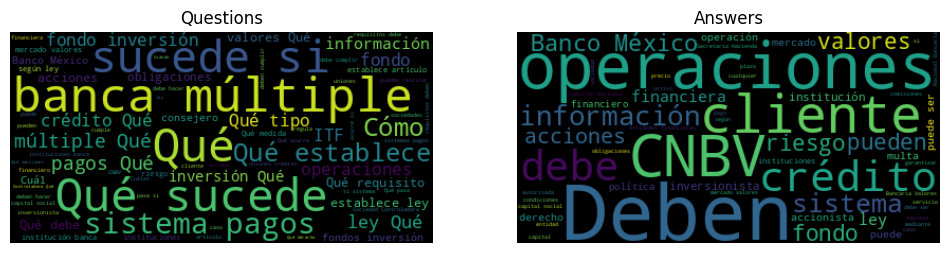

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))

# Combinar todas las preguntas tokenizadas en una sola cadena de texto
all_questions = ' '.join([' '.join(tokens) for tokens in df_clean['question_tokens']])
all_answers = ' '.join([' '.join(tokens) for tokens in df_clean['answer_tokens']])

# Nube de palabras de las preguntas:
wordcloudnn = WordCloud().generate(all_questions)
ax1.imshow(wordcloudnn, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Questions')

# Nube de palabras de las respuestas:
wordcloudnn = WordCloud().generate(all_answers)
ax2.imshow(wordcloudnn, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Answers')

plt.show()

### V. Conclusiones